**Aconselho visualisar no Google colab**

Informações do conjunto de dados:

Atualmente, as bicicletas de aluguel são introduzidas em muitas cidades urbanas para aumentar o conforto da mobilidade. É importante disponibilizar a bicicleta alugada e acessível ao público na hora certa, pois diminui o tempo de espera. Eventualmente, fornecer à cidade um suprimento estável de bicicletas para aluguel se torna uma grande preocupação. A parte crucial é a previsão do número de bicicletas necessário a cada hora para o fornecimento estável de bicicletas de aluguel.
O conjunto de dados contém informações meteorológicas (temperatura, umidade, velocidade do vento, visibilidade, ponto de orvalho, radiação solar, queda de neve, precipitação), o número de bicicletas alugadas por hora e informações de data.


Informações do atributo:

Date : ano-mês-dia

Rented Bike Count	Hour - Contagem de bicicletas alugadas a cada hora

Hora - Hora do dia

Temperatura-Temperatura em Celsius

Umidade - %

Velocidade do vento - m/s

Visibilidade - 10m Temperatura do

ponto de orvalho - Celsius

Radiação solar - MJ/ m2

Precipitação - mm

Neve - cm

Estações do ano - Inverno, Primavera, Verão, Outono

Feriado - Feriado/Sem feriado

Dia Funcional - NãoFunc(Horas Não Funcionais), Diversão(Horas Funcionais)

# **Importando e analisando os Dados:**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("SeoulBikeData.csv", encoding= 'unicode_escape')
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Verificando se há dados nulos:**

In [7]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [4]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [5]:
df.corr()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature(°C),0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity(%),-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed (m/s),0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility (10m),0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature(°C),0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation (MJ/m2),0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall(mm),-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall (cm),-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


<Axes: >

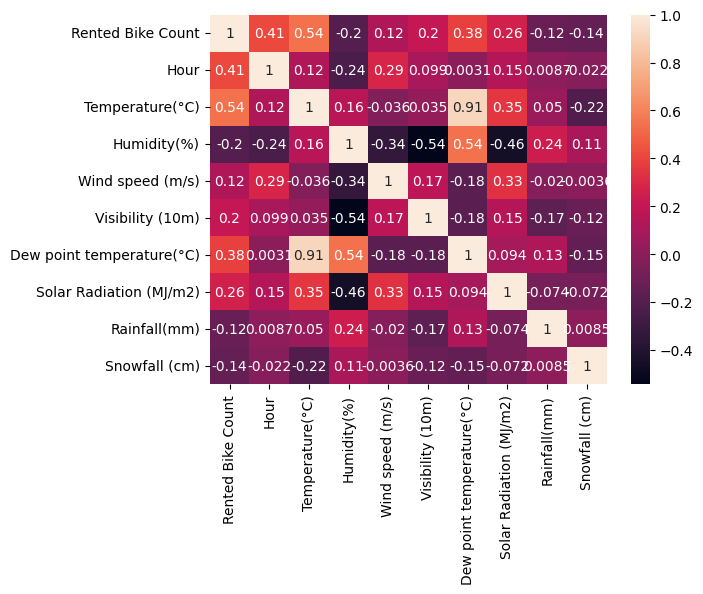

In [6]:
sns.heatmap(df.corr(), annot=True)

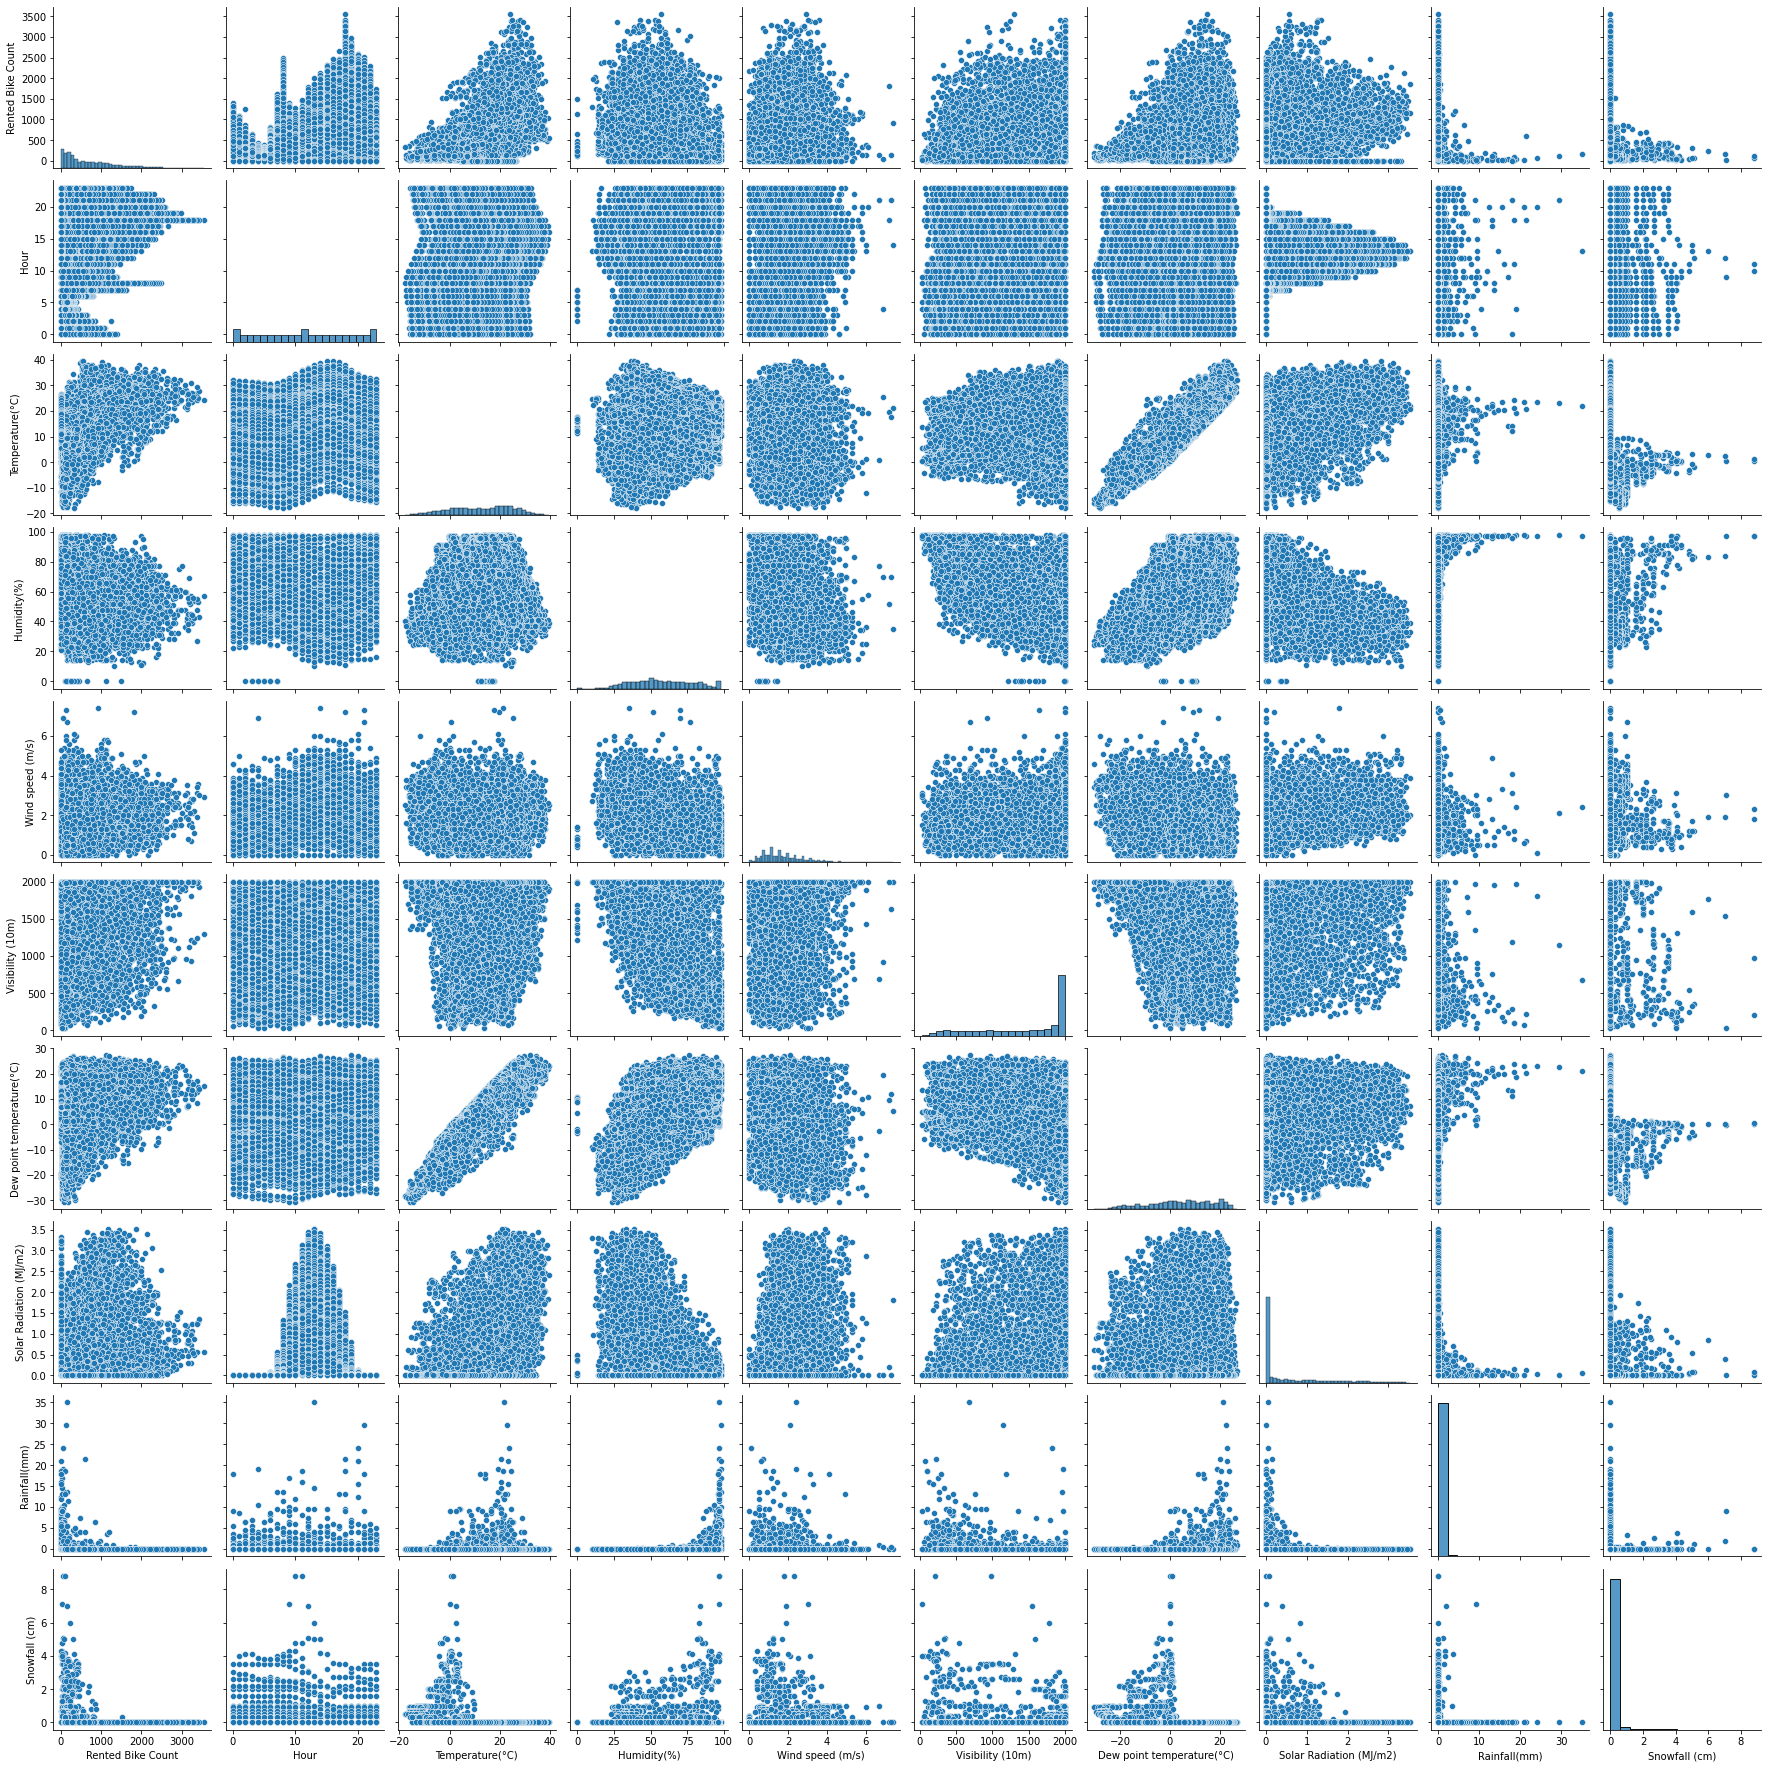

In [ ]:
sns.pairplot(df);

# **Fazendo o tratamento**

In [8]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


**Vamos agora transformar as variáveis categóricas em numéricas, pois os estimadores só modelam dados numéricos.**

**Transformando as Features categóricas em numéricas - OrdinalEncoder() - Feature com mais de 2 dados diferentes.**

In [12]:
lista_oe = ["Date", "Seasons", "Holiday", "Functioning Day"] 

for i in lista_oe:  
  oe =  OrdinalEncoder()
  oe.fit(df[[i]])

  df[i]= oe.transform(df[[i]])

**Verificando a transformação. Perceba que as variáveis (colunas) que tinham dados categóricos passaram para numéricos, inclusive a coluna que tinha data.**

In [13]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,11.0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1.0
1,11.0,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1.0
2,11.0,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3.0,1.0,1.0
3,11.0,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3.0,1.0,1.0
4,11.0,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,356.0,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0.0,1.0,1.0
8756,356.0,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0.0,1.0,1.0
8757,356.0,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0.0,1.0,1.0
8758,356.0,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0.0,1.0,1.0


**Agora vamos escalonar todos os dados para ficarem com dimensões próximas.**

In [15]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [16]:
ssc = StandardScaler()

ssc.fit(df[['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']])
h= ssc.transform(df[['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']])
df[['Date', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day']] = h

**Vericando...todos os dados escalonados!! Exceto o target.**

In [17]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,-1.622914,254,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668
1,-1.622914,204,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668
2,-1.622914,173,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668
3,-1.622914,107,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668
4,-1.622914,78,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1.651386,1003,1.083473,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,-0.171891,-1.342395,0.227757,0.18668
8756,1.651386,764,1.227936,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,-0.171891,-1.342395,0.227757,0.18668
8757,1.651386,694,1.372399,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,-0.171891,-1.342395,0.227757,0.18668
8758,1.651386,712,1.516862,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,-0.171891,-1.342395,0.227757,0.18668


# **KNN Regressor**

**O KNN é um estimador onde o aprendizado é baseado “no quão similar” é um dado (um vetor) do outro. Como estamos tratando de regressão, talvez ele não seja válido, mas vamos testar.**

**Chamando o KNN...**

In [ ]:
knn = KNeighborsRegressor()

**Fazendo a grade de parâmetros do KNN**

In [ ]:
param_grid_knn = {"weights" : ["uniform", "distance"],
                 "algorithm" : ["auto", "ball_tree", "kd_tree", "brute"],
                 "n_neighbors" : range(2, 21)}

**Vamos jogar para 10 splits**

In [ ]:
splitter = StratifiedKFold(n_splits=10, random_state=1980, shuffle=True)

**Separando os dados de treino com os dados de teste.**

In [ ]:
X = df.drop(columns=["Price"])
y = df["Price"]

# Dividindo em dados de teste e dados de treino, peguei 30% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1080)

**Motando a grade geral dos parâmetros com o GridSearch**

In [ ]:
model_knn = GridSearchCV(estimator=knn,
                       param_grid=param_grid_knn ,
                       scoring="r2", 
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

model_knn.fit(X_train, y_train)

Fitting 10 folds for each of 152 candidates, totalling 1520 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1980, shuffle=True),
             estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': range(2, 21),
                         'weights': ['uniform', 'distance']},
             scoring='r2', verbose=10)

In [ ]:
model_knn.best_params_

{'algorithm': 'auto', 'n_neighbors': 10, 'weights': 'distance'}

**Overfitou os dados de treino no KNN, vamos seguir com outros estimadores para ver se conseguimos melhoras.**

In [ ]:
# Predições de treino
y_pred_train_knn = model_knn.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train_knn):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_knn):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_knn)):.2f}")

# Predições de teste
y_pred_test_knn = model_knn.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test_knn):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_knn):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_knn)):.2f}") 


Métricas de treino:

R^2: 1.00
MAE: 115.05
RMSE: 3692.21

Métricas de teste:

R^2: 0.66
MAE: 209145.49
RMSE: 340270.40


In [ ]:
tabela_knn = pd.DataFrame()

In [ ]:
tabela_knn["Amostra existente"] = y_test

In [ ]:
tabela_knn["Predição"] = y_pred_test_knn

In [ ]:
tabela_knn["porcentagem de acerto %"]= (y_test/y_pred_test_knn)*100

In [ ]:
lista_num = []
for c in tabela_knn["porcentagem de acerto %"]:
  if c > 100:
    num = abs(c - 200)
    lista_num.append(num)
  else:
    num = c
    lista_num.append(num)
  

tabela_knn["porcentagem de acerto %"]= lista_num

In [ ]:
tabela_knn

,Amostra existente,Predição,porcentagem de acerto %
28860,1590000.0,1.789154e+06,88.868830
40998,782000.0,9.004688e+05,86.843654
32814,1063000.0,8.399630e+05,73.446807
47405,1337000.0,1.483512e+06,90.123962
39786,1625000.0,1.447493e+06,87.736908
...,...,...,...
34020,1005800.0,8.375238e+05,79.907887
42929,656000.0,8.265941e+05,79.361810
30781,812000.0,6.124905e+05,67.426509
25008,1220000.0,9.735360e+05,74.683626


Salvando a tabela

In [ ]:
tabela_knn.to_csv("01-knn_tabela_comparação.csv")

Salvando o estimador...

In [ ]:
import joblib

In [ ]:
joblib.dump(model_knn, 'knn_modelo.pkl')

['knn_modelo.pkl']

In [ ]:
knn_modelo = joblib.load('knn_modelo.pkl')

# **XGBoost Regressor**

In [ ]:
from xgboost import XGBRegressor

In [ ]:


X = df.drop(columns="Rented Bike Count")
y = df["Rented Bike Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tratando as Features numéricas
# ==========================================================
pipe_features_num = Pipeline([("std", StandardScaler())])

features_num = X_train.select_dtypes(include=np.number).columns.tolist()


# Tratando as Features categóricas binárias
# ==========================================================
pipe_features_ohe = Pipeline([("onehot", OneHotEncoder())])

features_ohe = ["Holiday", "Functioning Day"]

# Tratando as Features categóricas com mais de 2 classes
# ==========================================================
pipe_features_oe = Pipeline([("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

features_oe = ["Date", "Seasons"]

# ==========================================================
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                     ("transf_ohe", pipe_features_ohe, features_ohe),
                                     ("transf_oe", pipe_features_oe, features_oe)])

# pipeline final
pipe_xgb = Pipeline([("pre_processador", pre_processador),
                     ("xgb", XGBRegressor(eval_metric='logloss', random_state=42))])


splitter = KFold(n_splits=10, random_state=42, shuffle=True)


params_grid_xgb = {"xgb__n_estimators": [1000, 5000],
                   "xgb__max_depth": [1, 2],
                   "xgb__learning_rate": [0.01, 0.1]}

grid_xgb = GridSearchCV(estimator=pipe_xgb,
                       param_grid=params_grid_xgb,
                       scoring="r2",
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

grid_xgb.fit(X_train, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[11:09:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler())]),
                                                                         ['Hour',
                                                                          'Temperature(°C)',
                                                                          'Humidity(%)',
                                                                          'Wind '
                                                                          'speed '
                                                                          '(m/s)',
                                                                   

In [ ]:
grid_xgb.best_params_

{'xgb__learning_rate': 0.1, 'xgb__max_depth': 2, 'xgb__n_estimators': 5000}

In [ ]:
xgb_results = pd.DataFrame(grid_xgb.cv_results_)
xgb_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgb__learning_rate,param_xgb__max_depth,param_xgb__n_estimators,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
7,21.547833,0.100207,0.132787,0.006376,0.1,2,5000,"{'xgb__learning_rate': 0.1, 'xgb__max_depth': ...",0.887089,0.859717,...,0.862363,0.886827,0.856131,0.857992,0.859846,0.871058,0.864911,0.871055,0.015470,1
6,4.323234,0.038229,0.033833,0.005269,0.1,2,1000,"{'xgb__learning_rate': 0.1, 'xgb__max_depth': ...",0.872669,0.847663,...,0.843662,0.872284,0.840649,0.839798,0.841219,0.857457,0.860942,0.857293,0.017717,2
3,21.363370,0.081863,0.130124,0.007345,0.01,2,5000,"{'xgb__learning_rate': 0.01, 'xgb__max_depth':...",0.860593,0.834157,...,0.832359,0.861395,0.836659,0.832724,0.830490,0.842017,0.848256,0.846417,0.016914,3
2,4.311389,0.042351,0.029249,0.001152,0.01,2,1000,"{'xgb__learning_rate': 0.01, 'xgb__max_depth':...",0.800351,0.771452,...,0.772548,0.802540,0.784868,0.790366,0.768043,0.777570,0.795703,0.789299,0.017799,4
5,14.887905,0.563880,0.079482,0.001741,0.1,1,5000,"{'xgb__learning_rate': 0.1, 'xgb__max_depth': ...",0.769797,0.749387,...,0.759290,0.782916,0.749568,0.729748,0.741155,0.752946,0.763982,0.759749,0.019173,5
4,2.956416,0.019628,0.023871,0.005998,0.1,1,1000,"{'xgb__learning_rate': 0.1, 'xgb__max_depth': ...",0.754454,0.735685,...,0.741657,0.760569,0.736849,0.722723,0.725201,0.733852,0.749007,0.744534,0.017748,6
1,14.918992,0.587335,0.080377,0.007201,0.01,1,5000,"{'xgb__learning_rate': 0.01, 'xgb__max_depth':...",0.734144,0.715142,...,0.719276,0.740482,0.719330,0.712233,0.706035,0.711884,0.730458,0.725306,0.016540,7
0,2.988301,0.044912,0.021668,0.001425,0.01,1,1000,"{'xgb__learning_rate': 0.01, 'xgb__max_depth':...",0.644517,0.629858,...,0.623642,0.633890,0.631910,0.641462,0.615823,0.624555,0.632464,0.633946,0.012102,8


In [ ]:
# Predições de treino
y_pred_train_xgb = grid_xgb.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train_xgb):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_xgb):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_xgb)):.2f}")

# Predições de teste
y_pred_test_xgb = grid_xgb.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test_xgb):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_xgb):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_xgb)):.2f}") 


Métricas de treino:

R^2: 0.93
MAE: 117.19
RMSE: 169.68

Métricas de teste:

R^2: 0.86
MAE: 163.06
RMSE: 241.42


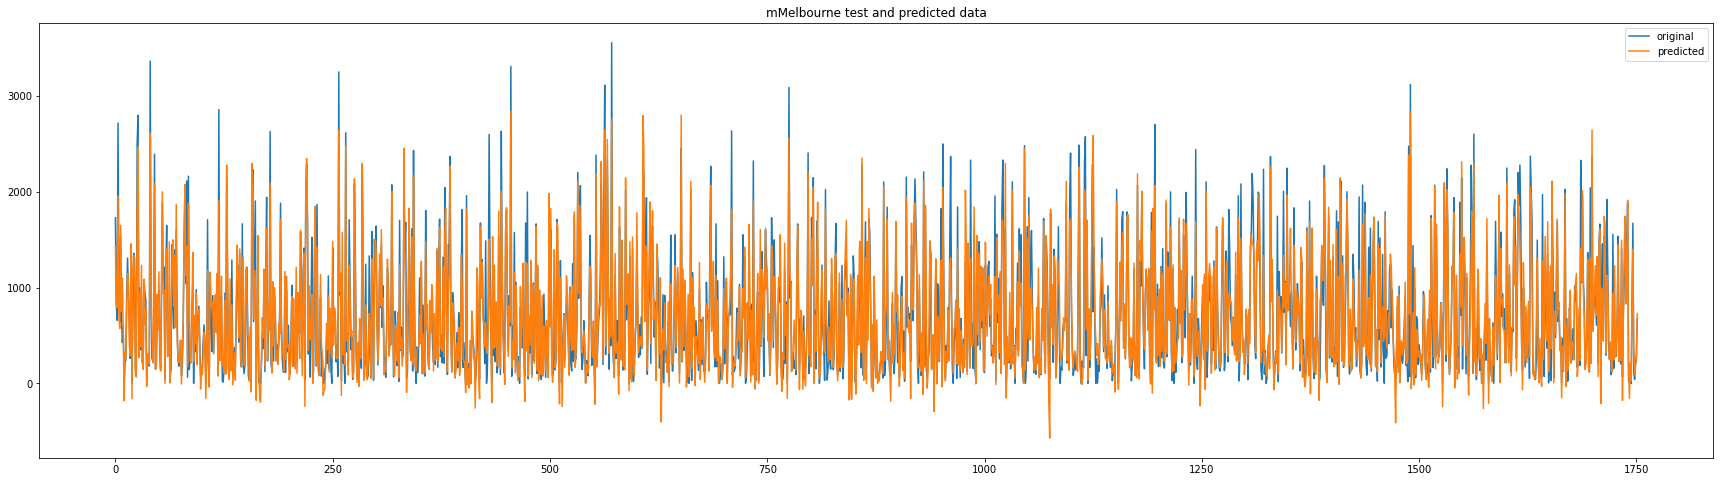

In [ ]:
plt.figure(figsize=(30,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_test_xgb, label="predicted")
plt.title("mMelbourne test and predicted data")
plt.legend()
plt.show();

In [ ]:
import pickle

In [ ]:
with open("grid_xgb.pkl", "wb") as f:
    pickle.dump(grid_xgb, f)

In [ ]:
with open("grid_xgb.pkl", "rb") as f:
    
    grid_xgb = pickle.load(f)

In [ ]:
y_pred_test_xgb

array([1429.2496 ,  832.71533,  788.79675, ...,  201.79686,  229.7028 ,
        728.0252 ], dtype=float32)

In [ ]:
y_test.values

array([1728,  822,  658, ...,  179,  294,  673])

**Vamos criar uma tabela com a porcentagem de acertos para cada dado**

In [ ]:
tabela_xgbr = pd.DataFrame()

In [ ]:
tabela_xgbr["valores reais"] = y_test

In [ ]:
tabela_xgbr["valores preditos"] = y_pred_test_xgb

In [ ]:
tabela_xgbr["porcentagem de acerto %"]= (y_test/y_pred_test_xgb)*100

In [ ]:
lista_num = []
for c in tabela_xgbr["porcentagem de acerto %"]:
  if c > 100:
    num = abs(c - 200)
    lista_num.append(num)
  else:
    num = c
    lista_num.append(num)
  

tabela_xgbr["porcentagem de acerto %"]= lista_num

In [ ]:
tabela_xgbr

,valores reais,valores preditos,porcentagem de acerto %
6056,1728,1429.249634,79.097398
5556,822,832.715332,98.713206
5990,658,788.796753,83.418193
7674,2716,1955.572388,61.114832
3319,1083,686.801208,42.312450
...,...,...,...
8307,122,350.242615,34.832997
100,42,92.962097,45.179704
6605,179,201.796860,88.703065
1783,294,229.702805,72.008528


In [ ]:
tabela_xgbr.to_csv("14-SeoulBikeData.csv")

# **Suport Vector Regressor - SVC**

## **Black Box**

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
#Separando o que é features e target:
X = df.drop(columns="Rented Bike Count")
y = df["Rented Bike Count"]

# Dividindo em dados de teste e dados de treino, peguei 20% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Iniciando a construção da Pipeline:
# ==========================================================
#Primeiro vamos tratar as features numéricas. Escalonando todos os dados.
pipe_features_num = Pipeline([("std", StandardScaler())])

features_num = X_train.select_dtypes(include=np.number).columns.tolist()
# ==========================================================
# Tratando as features categóricas.
pipe_features_oe = Pipeline([("ordinal", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

features_oe = ["Seasons"]

# ==========================================================
# Tratando as features categóricas. 

pipe_features_ohe = Pipeline([("OneHot", OneHotEncoder(handle_unknown='ignore'))])

features_ohe = ["Holiday", "Functioning Day", "Date"]

# ==========================================================
# Pré-processador => Pegando as pipelines anteriores e unindo-as.
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                     ("transf_cat_oe", pipe_features_oe, features_oe),
                                     ("transf_cat_ohe", pipe_features_ohe, features_ohe)])

# ==========================================================
# Pipeline final, usando o pré-processador e o estimador que queremos utilizar, neste caso o SVR para regressão.
pipe_svr = Pipeline([("pre_process", pre_processador),
                     ("svr", SVR())])




splitter = KFold(n_splits=10, random_state=42, shuffle=True)


params_grid_svr = {"svr__C": np.logspace(-2, 2, 5),

                   "svr__gamma": np.logspace(-2, 2, 5),
                   
                   "svr__kernel": ["linear"]}

grid_svr = GridSearchCV(estimator=pipe_svr,
                       param_grid=params_grid_svr,
                       scoring="r2",
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

grid_svr.fit(X_train, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_process',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('std',
                                                                                          StandardScaler())]),
                                                                         ['Hour',
                                                                          'Temperature(°C)',
                                                                          'Humidity(%)',
                                                                          'Wind '
                                                                          'speed '
                                                                          '(m/s)',
                                                                       

In [ ]:
grid_svr.best_params_

{'svr__C': 100.0, 'svr__gamma': 0.01, 'svr__kernel': 'linear'}

In [ ]:
svr_results = pd.DataFrame(grid_svr.cv_results_)
svr_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svr__C,param_svr__gamma,param_svr__kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
24,6.367738,0.765515,0.209925,0.007945,100.0,100.0,linear,"{'svr__C': 100.0, 'svr__gamma': 100.0, 'svr__k...",0.608622,0.587555,...,0.597582,0.630676,0.591025,0.626309,0.587682,0.639013,0.581934,0.606975,0.019588,1
22,6.378429,0.750177,0.215529,0.006466,100.0,1.0,linear,"{'svr__C': 100.0, 'svr__gamma': 1.0, 'svr__ker...",0.608622,0.587555,...,0.597582,0.630676,0.591025,0.626309,0.587682,0.639013,0.581934,0.606975,0.019588,1
21,6.373171,0.770812,0.216532,0.007430,100.0,0.1,linear,"{'svr__C': 100.0, 'svr__gamma': 0.1, 'svr__ker...",0.608622,0.587555,...,0.597582,0.630676,0.591025,0.626309,0.587682,0.639013,0.581934,0.606975,0.019588,1
20,6.394988,0.795520,0.214741,0.010667,100.0,0.01,linear,"{'svr__C': 100.0, 'svr__gamma': 0.01, 'svr__ke...",0.608622,0.587555,...,0.597582,0.630676,0.591025,0.626309,0.587682,0.639013,0.581934,0.606975,0.019588,1
23,6.356698,0.768219,0.220882,0.013608,100.0,10.0,linear,"{'svr__C': 100.0, 'svr__gamma': 10.0, 'svr__ke...",0.608622,0.587555,...,0.597582,0.630676,0.591025,0.626309,0.587682,0.639013,0.581934,0.606975,0.019588,1
19,3.317498,0.074607,0.220811,0.013722,10.0,100.0,linear,"{'svr__C': 10.0, 'svr__gamma': 100.0, 'svr__ke...",0.559630,0.548069,...,0.555088,0.565436,0.535623,0.583146,0.540742,0.586630,0.525632,0.556498,0.018680,6
18,3.345545,0.048854,0.216330,0.009219,10.0,10.0,linear,"{'svr__C': 10.0, 'svr__gamma': 10.0, 'svr__ker...",0.559630,0.548069,...,0.555088,0.565436,0.535623,0.583146,0.540742,0.586630,0.525632,0.556498,0.018680,6
17,3.307389,0.091621,0.217692,0.012669,10.0,1.0,linear,"{'svr__C': 10.0, 'svr__gamma': 1.0, 'svr__kern...",0.559630,0.548069,...,0.555088,0.565436,0.535623,0.583146,0.540742,0.586630,0.525632,0.556498,0.018680,6
16,3.330806,0.050923,0.223225,0.014919,10.0,0.1,linear,"{'svr__C': 10.0, 'svr__gamma': 0.1, 'svr__kern...",0.559630,0.548069,...,0.555088,0.565436,0.535623,0.583146,0.540742,0.586630,0.525632,0.556498,0.018680,6
15,3.297514,0.079717,0.217043,0.008047,10.0,0.01,linear,"{'svr__C': 10.0, 'svr__gamma': 0.01, 'svr__ker...",0.559630,0.548069,...,0.555088,0.565436,0.535623,0.583146,0.540742,0.586630,0.525632,0.556498,0.018680,6


In [ ]:
# Predições de treino
y_pred_train_svr = grid_svr.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train_svr):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train_svr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_svr)):.2f}")

# Predições de teste
y_pred_test_svr = grid_svr.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test_svr):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test_svr):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_svr)):.2f}") 


Métricas de treino:

R^2: 0.64
MAE: 265.01
RMSE: 389.17

Métricas de teste:

R^2: 0.59
MAE: 292.63
RMSE: 414.10


**O XGBOOST nos deu um melhor resultado.**

**Comparação dos valores reais com os valores preditos.**

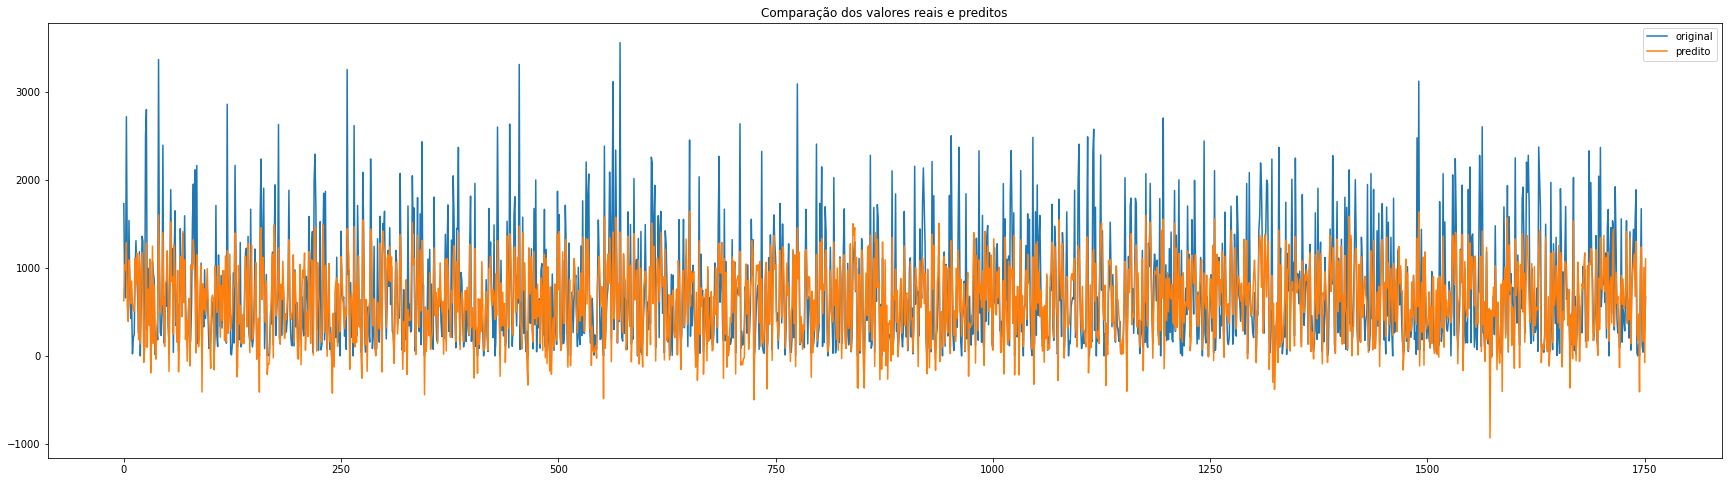

In [ ]:
plt.figure(figsize=(30,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred_test_svr, label="predito")
plt.title("Comparação dos valores reais e preditos")
plt.legend()
plt.show();

In [ ]:
tabela_svr = pd.DataFrame()

In [ ]:
tabela_svr["valores reais"] = y_test

In [ ]:
tabela_svr["valores preditos"] = y_pred_test_svr

In [ ]:
tabela_svr

,valores reais,valores preditos
6056,1728,626.801209
5556,822,1034.373150
5990,658,974.014467
7674,2716,1286.950505
3319,1083,575.769119
...,...,...
8307,122,503.189996
100,42,167.220894
6605,179,1005.499660
1783,294,-75.380114


Salvando a tabela...

In [ ]:
tabela_svr.to_csv("14-Seoul_Bike_Rent_svr.csv")

Salvando o estimador...

In [ ]:
import pickle

In [ ]:
with open("grid_svr.pkl", "wb") as f:
    pickle.dump(grid_svr, f)

In [ ]:
with open("grid_svr.pkl", "rb") as f:
    
    grid_svr = pickle.load(f)

# **Otimização Bayesiana**



---



---



---



In [ ]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV, KFold, train_test_split

from sklearn.pipeline import Pipeline

def pipe_pre_melbourne(drop_not_features=["Rented Bike Count"], col_target="Rented Bike Count",
                             inputer_num_strategy="mean",
                             encoding="ordinal"):
    '''
    - inputer_num_strategy (str): "mean", "median";
    - encoding (str): "onehot" para OneHotEncoder; "ordinal" OrdinalEncoder;
    '''

    X = df.drop(columns=drop_not_features)
    y = df[col_target]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # ==========================================================

    pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy=inputer_num_strategy)),
                                  ("std", StandardScaler())])

    features_num = X_train.select_dtypes(include=np.number).columns.tolist()

    # ==========================================================

    if encoding == "onehot":
    
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("onehot", OneHotEncoder(handle_unknown="ignore"))])
        
    elif encoding == "ordinal":
        
        pipe_features_cat = Pipeline([("input_cat", SimpleImputer(strategy="constant", fill_value="unknown")),
                                      ("ordinal", OrdinalEncoder(handle_unknown="use_encoded_value",
                                                                 unknown_value=-1))])
    
    else:
        
        raise ValueError("Únicos encodings disponíveis são 'ordinal' e 'onehot'")
        
        
    features_cat = X_train.select_dtypes(exclude=np.number).columns.tolist()

    # ==========================================================

    pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num),
                                         ("transf_cat", pipe_features_cat, features_cat)])

    return X_train, X_test, y_train, y_test, pre_processador

In [ ]:
X_train, X_test, y_train, y_test, pre_processador = pipe_pre_melbourne(drop_not_features=["Rented Bike Count"], 
                                                                            col_target="Rented Bike Count",
                                                                            inputer_num_strategy="mean",
                                                                            encoding="ordinal")

In [ ]:
from hyperopt import hp, tpe, fmin, Trials, space_eval

In [ ]:
hps_space = {"learning_rate" : hp.choice("learning_rate", [0.001, 0.01]),
             "n_estimators" : hp.choice("n_estimators", range(1, 5000)),
             "max_depth" : hp.choice("max_depth", [1, 2, 3]),
             "colsample_bytree": hp.choice("colsample_bytree", [0.1, 0.5, 0.9]),
             "subsample": hp.choice("subsample", [0.1, 0.5, 0.9])}
          

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
def objective(hps_space):
    
    pipe = Pipeline([("pp", pre_processador),
                     ("xgbr", XGBRegressor(**hps_space))])

    # =============================================

    splitter = KFold(n_splits=10, random_state=42, shuffle=True)

    results = cross_validate(pipe,
                             X_train, y_train, 
                             cv=splitter,
                             scoring="r2",
                             n_jobs=-1)

    r2 = results["test_score"].mean()

    return -r2

In [ ]:
ts = Trials()

best_hps = fmin(objective,
                space=hps_space,
                algo=tpe.suggest,
                trials=ts,
                max_evals=10)

100%|██████████| 10/10 [09:03<00:00, 54.37s/it, best loss: -0.8733159242377336]


In [ ]:
# pré-resposta da otimização
best_hps

{'colsample_bytree': 1,
 'learning_rate': 1,
 'max_depth': 2,
 'n_estimators': 4271,
 'subsample': 1}

In [ ]:
# a resposta final, vem com o space_eval
best_hps = space_eval(hps_space, best_hps)
best_hps

{'colsample_bytree': 0.5,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 4272,
 'subsample': 0.5}

In [ ]:
XGBRegressor(objective ='reg:squarederror', **best_hps)

XGBRegressor(colsample_bytree=0.5, learning_rate=0.01, n_estimators=4272,
             objective='reg:squarederror', subsample=0.5)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

def metricas_classificacao(estimator, X_train, X_test, y_train, y_test):

    # Predições de treino
    y_pred_train_ob = estimator.predict(X_train)

    print("\nMétricas de treino:\n")
    print(f"R^2: {r2_score(y_train, y_pred_train_ob):.2f}")
    print(f"MAE: {mean_absolute_error(y_train, y_pred_train_ob):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train_ob)):.2f}")

    # Predições de teste
    y_pred_test_ob = estimator.predict(X_test)

    print("\nMétricas de teste:\n")
    print(f"R^2: {r2_score(y_test, y_pred_test_ob):.2f}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test_ob):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test_ob)):.2f}") 

In [ ]:
pipe = Pipeline([("pp", pre_processador),
                 ("xgbr", XGBRegressor(objective ='reg:squarederror', **best_hps))])

pipe.fit(X_train, y_train)

metricas_classificacao(pipe, X_train, X_test, y_train, y_test)


Métricas de treino:

R^2: 0.91
MAE: 133.96
RMSE: 196.66

Métricas de teste:

R^2: 0.87
MAE: 156.44
RMSE: 236.72


**Superou o XGBoost**



---



---



---



#**Interpretando o modelo globalmente.**

**Para a interpretação vamos transformar todas as features em numéricas**

**SHAP**

In [ ]:
df_mg = pd.read_csv("SeoulBikeData.csv", encoding= 'unicode_escape')
df_mg 

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df_mg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

**Convertendo a coluna "Date" para Datetime:**

In [ ]:
df_mg["Date"] = pd.to_datetime(df_mg["Date"])

df_mg["Date"].head()

0   2017-01-12
1   2017-01-12
2   2017-01-12
3   2017-01-12
4   2017-01-12
Name: Date, dtype: datetime64[ns]

**Criando colunas apenas com mês e ano:**

In [ ]:
df_mg['mes'] = pd.DatetimeIndex(df_mg["Date"]).month
df_mg['ano'] = pd.DatetimeIndex(df_mg["Date"]).year
df_mg.drop(columns="Date", inplace=True)
df_mg.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mes,ano
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017


**Transformando as Features categóricas em numéricas - OneHotEnconder - Features de dados binários:**

In [ ]:
lista_oe = ["Holiday", "Functioning Day", "ano"]

for i in lista_oe:  
  oe =  OrdinalEncoder()
  oe.fit(df_mg[[i]])

  df_mg[i] = oe.transform(df_mg[[i]])

**Features categóricas em numéricas para dados não binários:**

**Transformando as Features categóricas em numéricas - OrdinalEncoder() - Feature com mais de 2 dados diferentes.**

In [ ]:
lista_oe = ["Seasons", "mes"]

for i in lista_oe:  
  oe =  OrdinalEncoder()
  oe.fit(df_mg[[i]])

  df_mg[i] = oe.transform(df_mg[[i]])

**Vamos escalonar todas as Features, pois a amplitude entre os dados está muito grande, isso pode causar um viés no resultado final:**

In [ ]:
df_mg.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'mes', 'ano'],
      dtype='object')

In [ ]:
ssc = StandardScaler()

ssc.fit(df_mg[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons','Holiday', 'Functioning Day', 'mes', 'ano']])
h= ssc.transform(df_mg[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons','Holiday', 'Functioning Day', 'mes', 'ano']])
df_mg[['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons','Holiday', 'Functioning Day', 'mes', 'ano']] = h

In [ ]:
df_mg.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,mes,ano
0,254,-1.661325,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.602745,-3.282407
1,204,-1.516862,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.602745,-3.282407
2,173,-1.372399,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.602745,-3.282407
3,107,-1.227936,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.602745,-3.282407
4,78,-1.083473,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,1.349771,0.227757,0.18668,-1.602745,-3.282407


In [ ]:
X = df_mg.drop(columns=["Rented Bike Count"])
y = df_mg["Rented Bike Count"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [ ]:
!pip install shap
import shap

In [ ]:
xgbr = XGBRegressor(bjective ='reg:squarederror').fit(X_train, y_train)

[14:08:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
explainer = shap.TreeExplainer(xgbr)

In [ ]:
shap_vals = explainer.shap_values(X_train)

**Temos abaixo as Features que mais impactaram na escolha dos valores preditivos para todos os dados:**

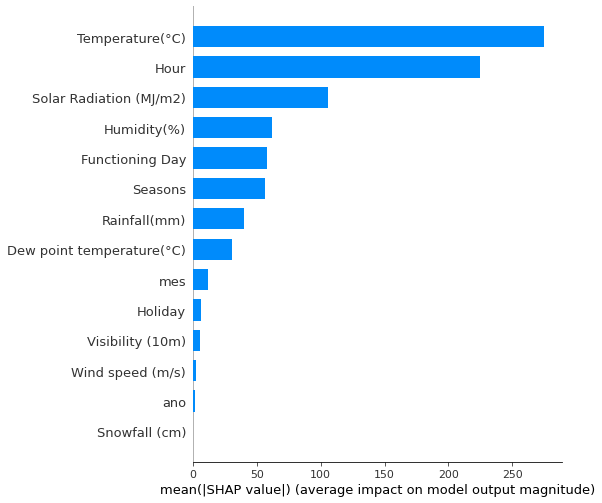

In [ ]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")

# **Pré-processamento para a rede neural**

In [ ]:
!pip install scikeras

In [ ]:
import numpy as np
%matplotlib inline
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from sklearn.pipeline import Pipeline
from keras.layers import Dense, Dropout
from sklearn.impute import SimpleImputer
from tensorflow.keras import backend as k 
from scikeras.wrappers import KerasRegressor
from sklearn.compose import ColumnTransformer
from tensorflow.keras.models import Sequential
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

# **Rede Neural - Keras Regressor**

In [ ]:
X = df_mg.drop(columns=["Rented Bike Count"])
y = df_mg["Rented Bike Count"]

#====================================================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#====================================================================================================
def criarRede(optimizer='rmsprop', init='glorot_uniform'):
    #k.clear_session()
    rn = Sequential([
                #1ª camada oculta
               tf.keras.layers.Dense(units=7, activation = "relu", kernel_initializer = "random_uniform", input_dim=X_train.shape[1]), # input_dim = nº de colunas
               tf.keras.layers.Dropout(0.2),
                #2ª camada oculta
               tf.keras.layers.Dense(units=7, activation = "relu", kernel_initializer = "random_uniform"),
               tf.keras.layers.Dropout(0.2),
               #Camada de saída
               tf.keras.layers.Dense(units= 1, activation = 'linear')])
    

    rn.compile(optimizer = optimizer, loss = "mean_absolute_error", metrics = ['mean_absolute_error'])


    return rn
#====================================================================================================
kr = KerasRegressor(model=criarRede)

pipe = Pipeline([('kr', kr)])

# ==========================================================
#Vamos dividir em splits para ter mais variedade no processamento dos dados.
splitter = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

# Opitmização de Hiperparêmetros
params = {"kr__optimizer": ["adam"],
          "kr__batch_size": [20],
          "kr__epochs":[1000]} 
#====================================================================================================
#Motando a grade geral de parâmetros.
grid_kr = GridSearchCV(estimator=pipe,
                       param_grid=params,
                       scoring="neg_mean_absolute_error",
                       cv=splitter,
                       verbose=10)

grid_kr.fit(X_train, y_train)

In [ ]:
grid_kr.best_params_

{'kr__batch_size': 20, 'kr__epochs': 1000, 'kr__optimizer': 'adam'}

In [ ]:
grid_kr.best_score_

-251.7615809211366

In [ ]:
y_pred = grid_kr.predict(X_test)

88/88 [==============================] - 0s 1ms/step


In [ ]:
y_pred

array([ 616.6917 ,  961.906  , 1066.3606 , ...,  584.6029 ,  166.46336,
        994.0375 ], dtype=float32)

In [ ]:
tabela = pd.DataFrame()

In [ ]:
tabela["Valor real"] = y_test

In [ ]:
tabela["Valor preditivo"] = y_pred

In [ ]:
tabela = tabela.sort_index()
tabela = tabela.reset_index()
tabela 

,index,Valor real,Valor preditivo
0,0,254,190.066269
1,8,930,200.648834
2,14,447,382.593811
3,17,555,320.634521
4,19,600,287.901184
...,...,...,...
1747,8738,300,192.139343
1748,8749,740,696.159668
1749,8750,761,727.591797
1750,8753,1047,831.093018


In [ ]:
lista = []
for c in range(tabela.shape[0]):
  if tabela.loc[[c]].values[0][2] < tabela.loc[[c]].values[0][1]:
      valor = (tabela.loc[[c]].values[0][2] / tabela.loc[[c]].values[0][1])*100
      lista.append(valor)
  elif tabela.loc[[c]].values[0][2] > tabela.loc[[c]].values[0][1]:
      valor = (tabela.loc[[c]].values[0][1] / tabela.loc[[c]].values[0][2])*100
      lista.append(valor)
media = np.mean(lista)
print(f"Teve uma média de acerto de {media:.2f}%")

Teve uma média de acerto de 63.30%


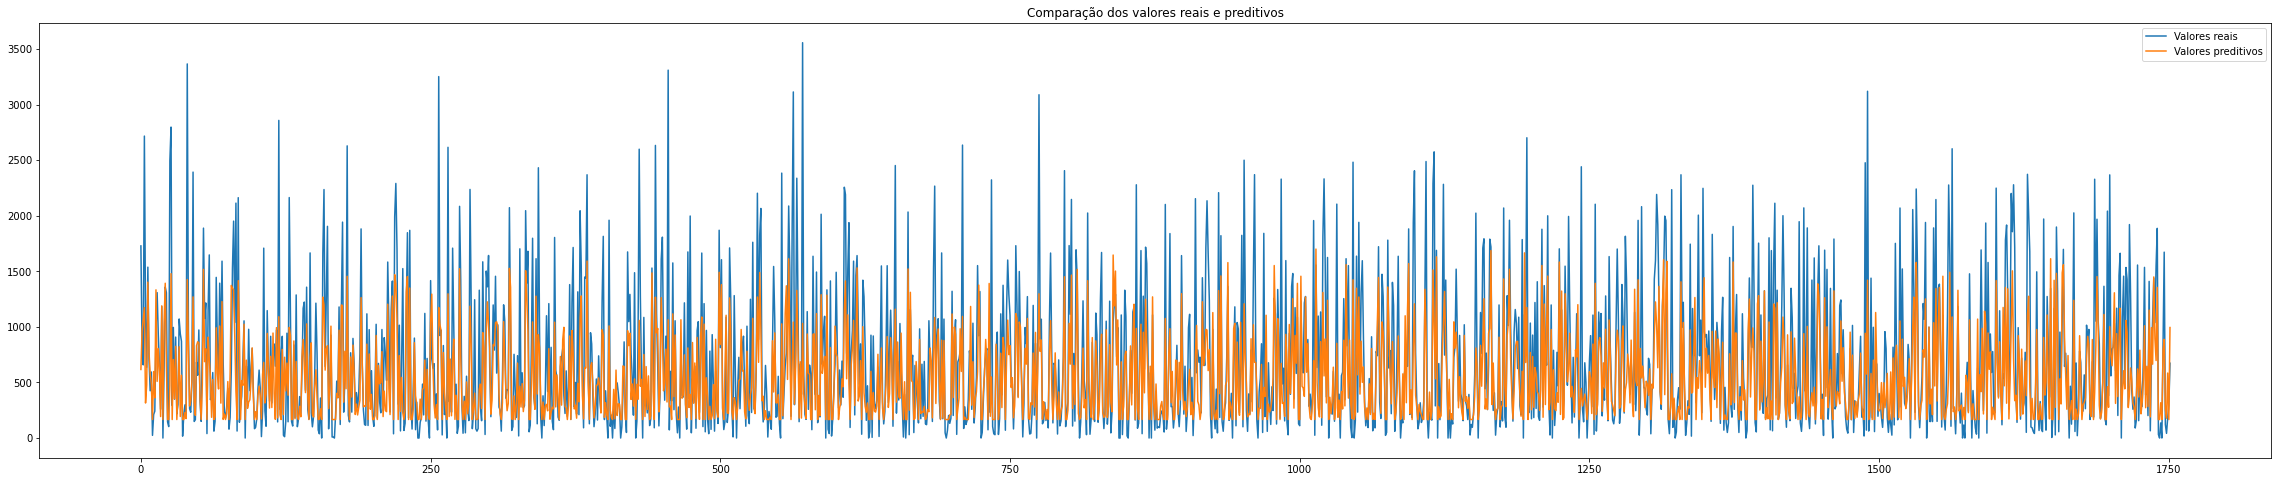

In [ ]:
plt.figure(figsize=(40,8))
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="Valores reais")
plt.plot(x_ax, y_pred, label="Valores preditivos")
plt.title("Comparação dos valores reais e preditivos")
plt.legend()
plt.show();

In [ ]:
import pickle

In [ ]:
with open("grid_kr.pkl", "wb") as f:
    pickle.dump(grid_kr, f)

In [ ]:
with open("grid_kr.pkl", "rb") as f:
    
    grid_kr = pickle.load(f)